# Peer-graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard
This notebook extracts Tesla and GameStop stock & revenue data and visualizes them.


In [53]:
# Install required libraries (only run once)
!pip install yfinance pandas matplotlib

In [54]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# ---------- Question 1: Tesla Stock Data ----------
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="5y")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-09-24 00:00:00-04:00,121.266670,133.166672,117.099998,129.263336,289683300,0.0,0.0
1,2020-09-25 00:00:00-04:00,131.156662,136.243332,130.433334,135.779999,201625500,0.0,0.0
2,2020-09-28 00:00:00-04:00,141.539993,142.693329,138.516663,140.399994,149158800,0.0,0.0
3,2020-09-29 00:00:00-04:00,138.666672,142.833328,137.199997,139.690002,150657900,0.0,0.0
4,2020-09-30 00:00:00-04:00,140.440002,144.643326,140.156662,143.003326,144436800,0.0,0.0


In [56]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# ---------- Question 2: Tesla Revenue Data ----------
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    for row in table.find("tbody").find_all("tr"):
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue != "" and revenue != "Revenue":
                tesla_revenue = pd.concat(
                    [tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
                    ignore_index=True
                )

# Clean Revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace("", None)
tesla_revenue.dropna(inplace=True)

# ✅ Now your dataframe has 'Date' and 'Revenue'
tesla_revenue.tail()


,Date,Revenue


In [57]:
# ---------- Question 3: GameStop Stock Data ----------
gme = yf.Ticker("GME")
gme_data = gme.history(period="5y")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-09-24 00:00:00-04:00,2.4275,2.4525,2.2525,2.2850,31755200,0.0,0.0
1,2020-09-25 00:00:00-04:00,2.2975,2.5450,2.2750,2.5050,30060800,0.0,0.0
2,2020-09-28 00:00:00-04:00,2.5400,2.5650,2.3875,2.5225,27057200,0.0,0.0
3,2020-09-29 00:00:00-04:00,2.5000,2.6625,2.4825,2.5875,20950400,0.0,0.0
4,2020-09-30 00:00:00-04:00,2.5625,2.6900,2.5150,2.5500,24316000,0.0,0.0


In [58]:
import requests
from bs4 import BeautifulSoup

# ---------- Question 4: GameStop Revenue Data ----------
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    for row in table.find("tbody").find_all("tr"):
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue != "" and revenue != "Revenue":
                gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Clean Revenue column (convert to numeric, drop empty rows)
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace("", None)
gme_revenue.dropna(inplace=True)
gme_revenue.tail()

,Date,Revenue


In [59]:
def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.plot(stock_data['Date'], stock_data['Close'], color="blue", label="Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color="blue")
    ax1.legend(loc="upper left")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color="red", label="Revenue")
    ax2.set_ylabel("Revenue", color="red")
    ax2.legend(loc="upper right")

    plt.title(f"{stock_name} Stock Price vs Revenue")
    plt.show()


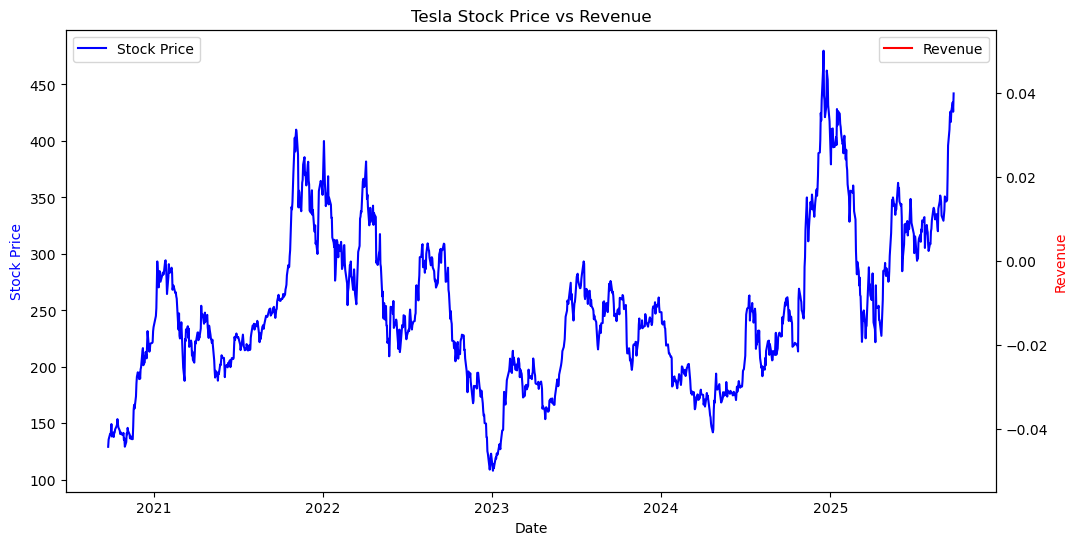

In [60]:
# ---------- Question 5: Tesla Stock Graph ----------
make_graph(tesla_data, tesla_revenue, "Tesla")

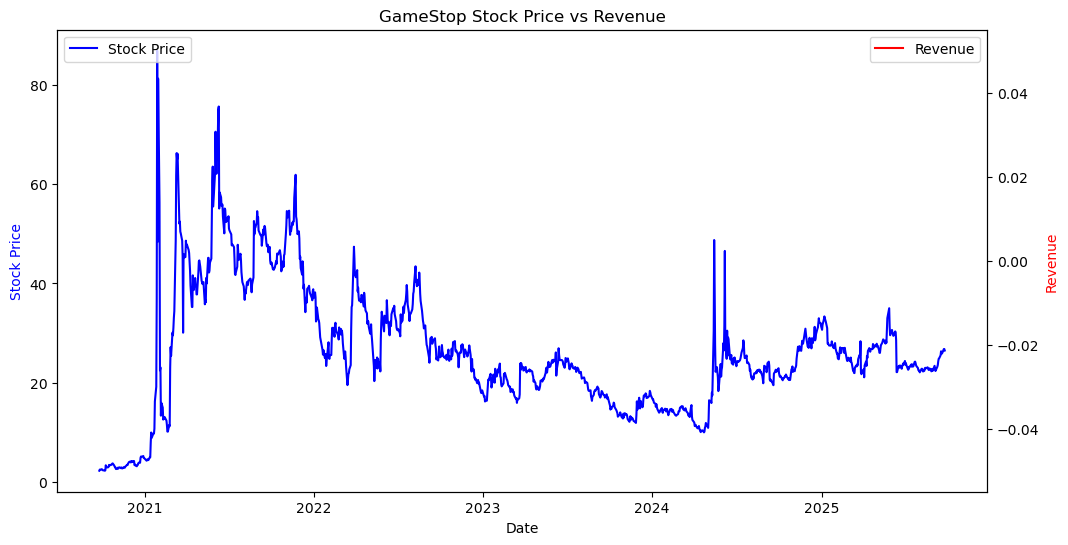

In [61]:
# ---------- Question 6: GameStop Stock Graph ----------
make_graph(gme_data, gme_revenue, "GameStop")